In [34]:
import requests
import os
import pandas as pd
import json
from api_keys import census_api_key
import matplotlib.pyplot as plt

house_valuesdf = pd.read_csv('income_vs_home_rent.csv')

In [35]:
#define years
years = [2019, 2020, 2021, 2022, 2023]

#create list to hold all the data returned
all_data = []

for year in years:
    #Set the base URL
    url = f"http://api.census.gov/data/{year}/acs/acs5" 
    #Set the Params
    params = {
    "get" : "NAME,B25077_001E",   #requests the county name and median household income
    "for" : "county:005,051,067",   #specific counties Clackamas, Multnomah, Washington
    "in" : "state:41",         #Oregon
    "key" : census_api_key
}


# Make the API request
    response = requests.get(url, params=params)
    census_data = response.json()
    for row in census_data[1:]:
        row_with_year = row + [year]
        all_data.append(row_with_year)
    print(json.dumps(all_data, indent=4))

[
    [
        "Washington County, Oregon",
        "386600",
        "41",
        "067",
        2019
    ],
    [
        "Clackamas County, Oregon",
        "395100",
        "41",
        "005",
        2019
    ],
    [
        "Multnomah County, Oregon",
        "386200",
        "41",
        "051",
        2019
    ]
]
[
    [
        "Washington County, Oregon",
        "386600",
        "41",
        "067",
        2019
    ],
    [
        "Clackamas County, Oregon",
        "395100",
        "41",
        "005",
        2019
    ],
    [
        "Multnomah County, Oregon",
        "386200",
        "41",
        "051",
        2019
    ],
    [
        "Clackamas County, Oregon",
        "421100",
        "41",
        "005",
        2020
    ],
    [
        "Multnomah County, Oregon",
        "410800",
        "41",
        "051",
        2020
    ],
    [
        "Washington County, Oregon",
        "413500",
        "41",
        "067",
        2020
    ]
]
[
    [
  

In [36]:
column_header = census_data[0] + ["Year"]
column_header

['NAME', 'B25077_001E', 'state', 'county', 'Year']

In [37]:
rows = all_data[1]
rows

['Clackamas County, Oregon', '395100', '41', '005', 2019]

In [38]:
census_data_df = pd.DataFrame(all_data, columns=column_header)
census_data_df


,NAME,B25077_001E,state,county,Year
0,"Washington County, Oregon",386600,41,067,2019
1,"Clackamas County, Oregon",395100,41,005,2019
2,"Multnomah County, Oregon",386200,41,051,2019
3,"Clackamas County, Oregon",421100,41,005,2020
4,"Multnomah County, Oregon",410800,41,051,2020
5,"Washington County, Oregon",413500,41,067,2020
6,"Clackamas County, Oregon",452200,41,005,2021
7,"Multnomah County, Oregon",437600,41,051,2021
8,"Washington County, Oregon",439300,41,067,2021
9,"Clackamas County, Oregon",532200,41,005,2022


In [39]:
census_data_df = census_data_df.rename(columns={'NAME': 'County', 'B25077_001E': 'Median House Value', 'state': 'State Code', 'county': 'County Code'})
census_data_df['Median House Value'].astype(float)
census_data_df

,County,Median House Value,State Code,County Code,Year
0,"Washington County, Oregon",386600,41,067,2019
1,"Clackamas County, Oregon",395100,41,005,2019
2,"Multnomah County, Oregon",386200,41,051,2019
3,"Clackamas County, Oregon",421100,41,005,2020
4,"Multnomah County, Oregon",410800,41,051,2020
5,"Washington County, Oregon",413500,41,067,2020
6,"Clackamas County, Oregon",452200,41,005,2021
7,"Multnomah County, Oregon",437600,41,051,2021
8,"Washington County, Oregon",439300,41,067,2021
9,"Clackamas County, Oregon",532200,41,005,2022


In [40]:
house_valuesdf

,County,Year,Median Household Income,Median Home Value,Median Gross Rent
0,"Washington County, Oregon",2019,82215,386600,1359
1,"Clackamas County, Oregon",2019,80484,395100,1295
2,"Multnomah County, Oregon",2019,69176,386200,1237
3,"Clackamas County, Oregon",2020,82911,421100,1356
4,"Multnomah County, Oregon",2020,71425,410800,1309
5,"Washington County, Oregon",2020,86626,413500,1440
6,"Clackamas County, Oregon",2021,88517,452200,1447
7,"Multnomah County, Oregon",2021,76290,437600,1394
8,"Washington County, Oregon",2021,92025,439300,1541
9,"Clackamas County, Oregon",2022,95740,532200,1605


In [ ]:
housevaluecols = ['County','Year','Median Home Value']
median_homevalsdf = house_valuesdf[housevaluecols].dropna()
median_homevalsdf

In [42]:
County_HomeVals=median_homevalsdf.groupby(['County','Median Home Value']).mean()
County_HomeVals_clean=County_HomeVals.reset_index('Median Home Value')

County_HomeVals_clean


,Median Home Value,Year
County,,
"Clackamas County, Oregon",395100,2019.0
"Clackamas County, Oregon",421100,2020.0
"Clackamas County, Oregon",452200,2021.0
"Clackamas County, Oregon",532200,2022.0
"Clackamas County, Oregon",577900,2023.0
"Multnomah County, Oregon",386200,2019.0
"Multnomah County, Oregon",410800,2020.0
"Multnomah County, Oregon",437600,2021.0
"Multnomah County, Oregon",492100,2022.0


In [43]:
Clackamas_df= median_homevalsdf[median_homevalsdf['County'] == 'Clackamas County, Oregon']
Multnomah_df= median_homevalsdf[median_homevalsdf['County']== 'Multnomah County, Oregon']
Washington_df = median_homevalsdf[median_homevalsdf['County']== 'Washington County, Oregon']
Washington_df.dtypes

County               object
Year                  int64
Median Home Value     int64
dtype: object

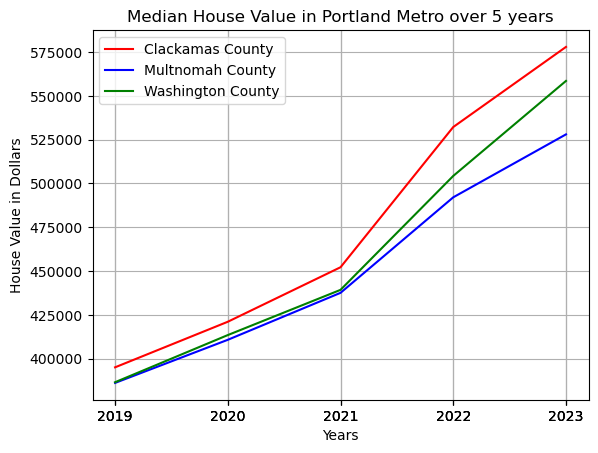

In [44]:
Clackamas_line, = plt.plot(Clackamas_df['Year'],Clackamas_df['Median Home Value'], color = 'red', label='Clackamas County')
Multnomah_line, = plt.plot(Multnomah_df['Year'],Multnomah_df['Median Home Value'], color='blue', label='Multnomah County')
Washington_line, = plt.plot(Washington_df['Year'],Washington_df['Median Home Value'], color='green', label='Washington County')

plt.xlabel("Years")
plt.ylabel("House Value in Dollars")
plt.gca().set_xticks(median_homevalsdf['Year'])
plt.grid()
plt.title("Median House Value in Portland Metro over 5 years")
plt.legend(handles=[Clackamas_line, Multnomah_line,Washington_line])
plt.savefig('Median_Home_Values.png')
plt.show()


